In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from glob import glob
from PIL import Image
import pandas as pd

In [2]:
female = glob('./data/crop/female_crop/*.png') 
male = glob('./data/crop/male_crop/*.png') 

In [3]:
allPaths = female + male

In [4]:
#size of image
def getSize(path):
    img = Image.open(path)
    return img.size[0]

In [5]:
#create dataframe
df = pd.DataFrame(data = allPaths, columns=['path'])
df.head()

,path
0,./data/crop/female_crop/female_3502.png
1,./data/crop/female_crop/female_1315.png
2,./data/crop/female_crop/female_1473.png
3,./data/crop/female_crop/female_5615.png
4,./data/crop/female_crop/female_3264.png


In [6]:
df['size'] = df['path'].apply(getSize)
df.head()

,path,size
0,./data/crop/female_crop/female_3502.png,201
1,./data/crop/female_crop/female_1315.png,96
2,./data/crop/female_crop/female_1473.png,57
3,./data/crop/female_crop/female_5615.png,202
4,./data/crop/female_crop/female_3264.png,236


# Exploratory Data Analysis


In [7]:
df.describe()

,size
count,9734.000000
mean,132.300288
std,68.114516
min,24.000000
25%,75.000000
50%,118.000000
75%,179.000000
max,358.000000


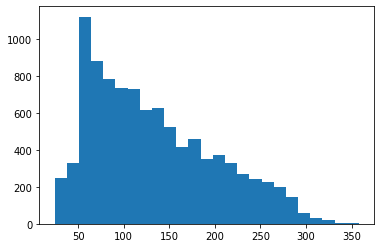

In [10]:
plt.hist(df['size'], bins = 25)
plt.show()

In [46]:
#we are not going to consider images with size <= 75
df_new = df[df['size'] > 75]
df_new

,path,size,gender
0,./data/crop/female_crop/female_3502.png,201,female
1,./data/crop/female_crop/female_1315.png,96,female
3,./data/crop/female_crop/female_5615.png,202,female
4,./data/crop/female_crop/female_3264.png,236,female
5,./data/crop/female_crop/female_5601.png,89,female
...,...,...,...
9728,./data/crop/male_crop/male_20.png,223,male
9729,./data/crop/male_crop/male_3580.png,184,male
9730,./data/crop/male_crop/male_34.png,182,male
9732,./data/crop/male_crop/male_391.png,246,male


In [47]:
#adding gender column
def gender(path):
    try:
        return path.split('_')[1].split('/')[1]
    except:
        return None

In [48]:
df['gender'] = df['path'].apply(gender)

In [49]:
df

,path,size,gender
0,./data/crop/female_crop/female_3502.png,201,female
1,./data/crop/female_crop/female_1315.png,96,female
2,./data/crop/female_crop/female_1473.png,57,female
3,./data/crop/female_crop/female_5615.png,202,female
4,./data/crop/female_crop/female_3264.png,236,female
...,...,...,...
9729,./data/crop/male_crop/male_3580.png,184,male
9730,./data/crop/male_crop/male_34.png,182,male
9731,./data/crop/male_crop/male_4589.png,57,male
9732,./data/crop/male_crop/male_391.png,246,male


In [50]:
#to check ratio of males to females
print(df['gender'].value_counts(normalize = True))

female    0.559893
male      0.440107
Name: gender, dtype: float64


In [53]:
#conclusion: 
##nearly 56% females, 44% males


In [55]:
df_new['size'].min()

76

# Resizing

In [61]:
#resize image to 100 X 100
def resize_img(path):
    try:
        img = cv2.imread(path)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        size = gray.shape[0]
        if(size >= 100):
            gray_resized = cv2.resize(gray, (100, 100), cv2.INTER_AREA) #shrink
        else:
            gray_resized = cv2.resize(gray, (100, 100), cv2.INTER_CUBIC) #enlarge

        return gray_resized.flatten()
    except:
        return None

In [64]:
#structuring data
df_new['structured_data'] = df_new['path'].apply(resize_img)

/var/folders/mb/f9hpl9_d4g12yfs45zz9c7vh0000gn/T/ipykernel_5761/1143537010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['structured_data'] = df_new['path'].apply(resize_img)


In [65]:
df_new

,path,size,gender,strucutured_data,structured_data
0,./data/crop/female_crop/female_3502.png,201,female,"[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2...","[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2..."
1,./data/crop/female_crop/female_1315.png,96,female,"[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2...","[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2..."
3,./data/crop/female_crop/female_5615.png,202,female,"[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2...","[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2..."
4,./data/crop/female_crop/female_3264.png,236,female,"[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2...","[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2..."
5,./data/crop/female_crop/female_5601.png,89,female,"[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2...","[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2..."
...,...,...,...,...,...
9728,./data/crop/male_crop/male_20.png,223,male,"[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2...","[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2..."
9729,./data/crop/male_crop/male_3580.png,184,male,"[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2...","[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2..."
9730,./data/crop/male_crop/male_34.png,182,male,"[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2...","[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2..."
9732,./data/crop/male_crop/male_391.png,246,male,"[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2...","[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2..."


In [66]:
#expand columns
df_expanded = df_new['structured_data'].apply(pd.Series)

In [68]:
df_new_2 = pd.concat((df_new['gender'], df_expanded), axis =1)

In [69]:
df_new_2.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,29,29,29,29,29,29,29,29,29,...,95,98,99,98,99,102,102,102,104,68
1,female,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
3,female,29,29,29,29,29,29,29,29,29,...,30,30,30,30,31,31,31,31,30,30
4,female,29,29,29,29,29,29,29,29,29,...,49,49,49,49,48,48,48,48,47,41
5,female,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29


In [73]:
df_new_2.loc[0]['gender']

'female'

Text(0.5, 1.0, 'Label: female')

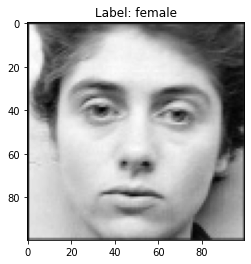

In [77]:
plt.imshow(df_new_2.loc[0][1:].values.reshape(100, 100).astype('int'), cmap='gray')
plt.title("Label: " + df_new_2.loc[0]['gender'])

In [85]:
#store dataframe
import pickle
pickle.dump(df_new_2, open('./data/dataframe_images_100_100.pickle', 'wb'))